In [1]:
using Pkg
Pkg.activate("../tambo/")
using Revise
push!(LOAD_PATH, String(@__DIR__)*"/../tambo/src")
using Tracks
using Geometries
using Plots
using Random

  Activating project at `~/research/TAMBO-MC/tambo`


In [2]:
fpoint = TPoint(1, 2, 0)
tr = Track(fpoint)
println(tr.ipoint)
println(tr.fpoint)
println(tr.direction)

TPoint(0, 0, 0)
TPoint(1, 2, 0)
Direction(1.5707963267948966, 1.1071487177940904, 0.4472135954999579, 0.8944271909999159, 0.0)


In [3]:
ipoint = TPoint(-1, -2, -3)
fpoint = TPoint(1, 2, 3)
println(tr.ipoint)
println(tr.fpoint)
println(tr.direction)

TPoint(0, 0, 0)
TPoint(1, 2, 0)
Direction(1.5707963267948966, 1.1071487177940904, 0.4472135954999579, 0.8944271909999159, 0.0)


TPoint(30, 20, 30)
TPoint(76.18802153517007, 100.0, 30.000000000000007)
Direction(1.5707963267948966, 1.0471975511965976, 0.5000000000000001, 0.8660254037844386, 6.123233995736766e-17)


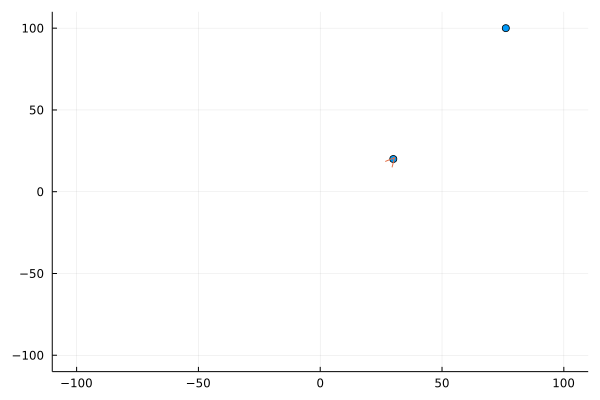

In [4]:
ipoint = TPoint(30, 20, 30)
d = Direction(π/2, π/3)
b = Box([-100, -100, -100], [100, 100, 100])
tr = Track(ipoint, d, b)
println(tr.ipoint)
println(tr.fpoint)
println(tr.direction)
plt = scatter([tr.ipoint.x, tr(1).x], [tr.ipoint.y, tr(1).y], label=false)
plot!(xlim=(-110, 110), ylim=(-110, 110), zlim=(-110, 110))
quiver!(plt, [tr.ipoint.x], [tr.ipoint.y], quiver=([tr.direction.x_proj], [tr.direction.y_proj]))

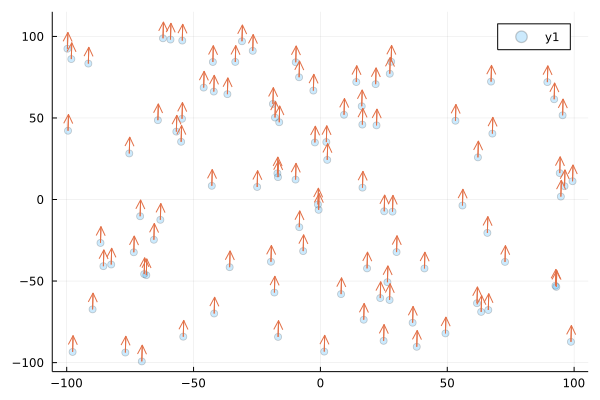

In [5]:
N = 100
xx = rand(N) .* 200 .- 100
yy = rand(N) .* 200 .- 100
# zz = rand(N) .* 200 .- 100
pts = TPoint.(xx, yy, Ref(0))
# pts = TPoint.(xx, yy, zz)
θθ = acos.(rand(N) .*2 .-1)
ϕϕ = (2*π).*rand(N)
dirs = Direction.(Ref(0), ϕϕ)
# dirs = Direction.(θθ, ϕϕ)
b = Box([-100, -100, -100], [100, 100, 100])
trs = Track.(pts, dirs, Ref(b));

plt = scatter(
    getfield.(getfield.(trs, :ipoint), :x), 
    getfield.(getfield.(trs, :ipoint), :y), 
    alpha=0.2
#     getfield.(getfield.(trs, :ipoint), :z)
)
quiver!(
    plt,
    getfield.(getfield.(trs, :ipoint), :x), 
    getfield.(getfield.(trs, :ipoint), :y), 
    quiver=(
        rand(N),
#         getfield.(getfield.(trs, :direction), :ϕ),
        10
    )
)

┌ Warning: Keyword argument letter not supported with Plots.GRBackend().  Choose from: Set([:top_margin, :group, :inset_subplots, :background_color, :ytickfontsize, :yforeground_color_text, :yguidefontcolor, :tickfontfamily, :show_empty_bins, :seriesalpha, :seriescolor, :ztick_direction, :xgrid, :ygridalpha, :zlims, :xtick_direction, :colorbar, :legend_font_family, :zflip, :ticks, :linealpha, :overwrite_figure, :arrow, :xguidefonthalign, :normalize, :linestyle, :xtickfontvalign, :xflip, :zgrid, :fillcolor, :ygrid, :bar_width, :colorbar_scale, :background_color_inside, :zguidefonthalign, :bins, :zguide, :zforeground_color_text, :legend_font_valign, :yscale, :legend_font_color, :weights, :xgridalpha, :ygridstyle, :clims, :xtickfontcolor, :fill_z, :xguide, :markershape, :background_color_subplot, :ztickfontfamily, :fillalpha, :markerstrokewidth, :tick_direction, :xguidefontvalign, :xguidefontfamily, :gridlinewidth, :foreground_color_subplot, :xgridlinewidth, :yguidefontsize, :foreground_c

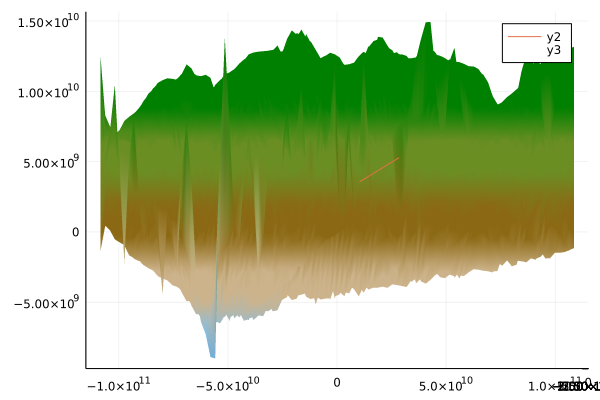

In [6]:
geo = Geometry("/Users/jlazar/research/TAMBO-MC/resources/tambo_spline.npy")
N = 1000
Random.seed!(9251994)
xx = rand(N) .* (abs(geo.box.c1[1] - geo.box.c2[1]) + minimum([geo.box.c1[1], geo.box.c2[1]]))
yy = rand(N) .* (abs(geo.box.c1[2] - geo.box.c2[2]) + minimum([geo.box.c1[2], geo.box.c2[2]]))
zz = rand(N) .* 3e8
pts = TPoint.(xx, yy, zz)
θθ = acos.(rand(N) .- 1)
ϕϕ = (2*π).*rand(N)
dirs = Direction.(θθ, ϕϕ)
trs = Track.(pts, dirs, Ref(geo.box))
ixs = Tracks.intersect.(trs, geo.valley)
plt = surface(
    LinRange(geo.box.c1[1], geo.box.c2[1], 100),
    LinRange(geo.box.c1[2], geo.box.c2[2], 100),
    geo.valley,
    c=cgrad(palette([:skyblue3, :skyblue2, :navajowhite3, :navajowhite3, :goldenrod4, :goldenrod4, :olivedrab, :olivedrab, :green, :green, :green, :green])),
    colorbar=false,
)
k = 44
plot!(plt, [trs[k](0).x, trs[k](1).x], [trs[k](0).y, trs[k](1).y])
# plot!(plt, Tracks.reduce_f(trs[k], geo.valley).(0, 1, 100))
plot!(plt, camera=(0,0))
scatter!(plt, getfield.(trs[k].(ixs[k]), :x), getfield.(trs[k].(ixs[k]), :y))

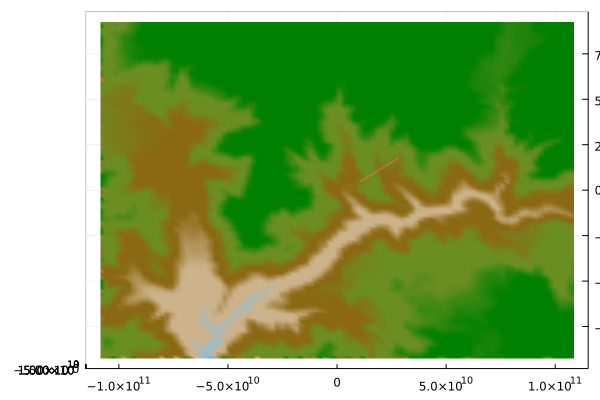

In [7]:
# geo = Geometry("/Users/jlazar/research/TAMBO-MC/resources/tambo_spline.npy")
# N = 100
# Random.seed!(9251994)
# xx = rand(N) .* (abs(geo.box.c1[1] - geo.box.c2[1]) + minimum([geo.box.c1[1], geo.box.c2[1]]))
# yy = rand(N) .* (abs(geo.box.c1[2] - geo.box.c2[2]) + minimum([geo.box.c1[2], geo.box.c2[2]]))
# zz = rand(N) .* 3e8
# pts = TPoint.(xx, yy, zz)
# θθ = acos.(rand(N) .- 1)
# ϕϕ = (2*π).*rand(N)
# dirs = Direction.(θθ, ϕϕ)
# trs = Track.(pts, dirs, Ref(geo.box))
# ixs = Tracks.intersect.(trs, geo.valley)
plt = surface(
    LinRange(geo.box.c1[1], geo.box.c2[1], 100),
    LinRange(geo.box.c1[2], geo.box.c2[2], 100),
    geo.valley,
    c=cgrad(palette([:skyblue3, :skyblue2, :navajowhite3, :navajowhite3, :goldenrod4, :goldenrod4, :olivedrab, :olivedrab, :green, :green, :green, :green])),
    colorbar=false,
)
plot!(plt, [trs[k](0).x, trs[k](1).x], [trs[k](0).y, trs[k](1).y], label=false)
# plot!(plt, Tracks.reduce_f(trs[k], geo.valley).(0, 1, 100))
plot!(plt, camera=(0, 90))
scatter!(plt, getfield.(trs[k].(ixs[k]), :x), getfield.(trs[k].(ixs[k]), :y), label=false)

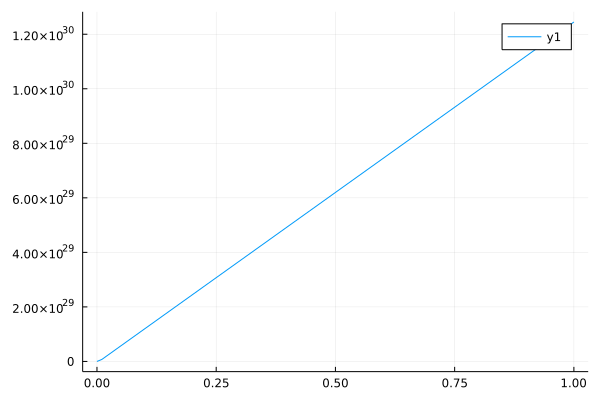

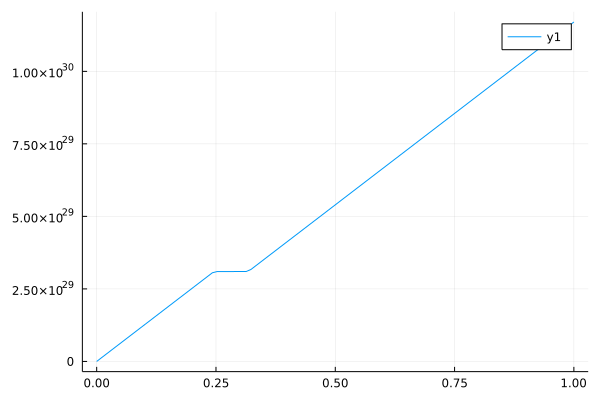

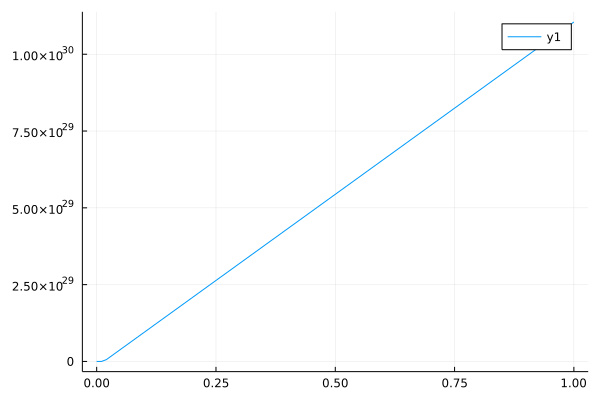

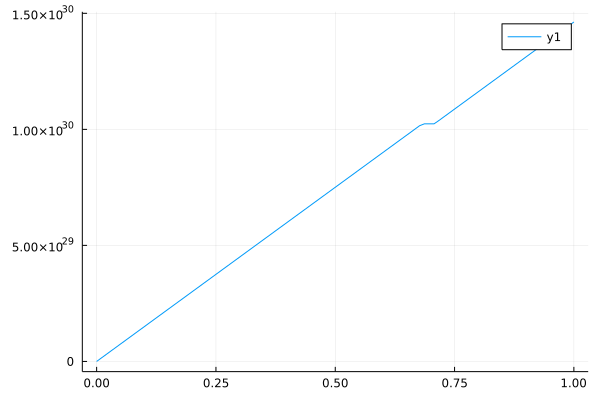

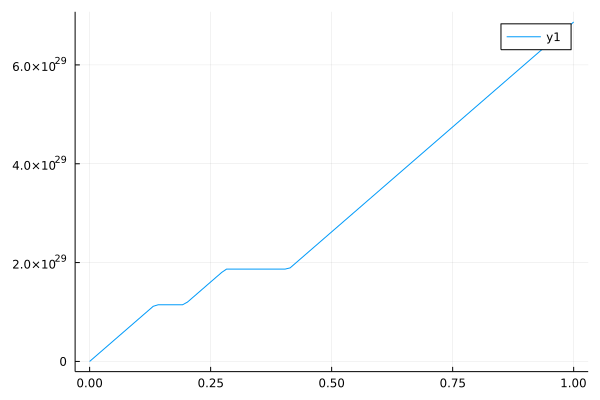

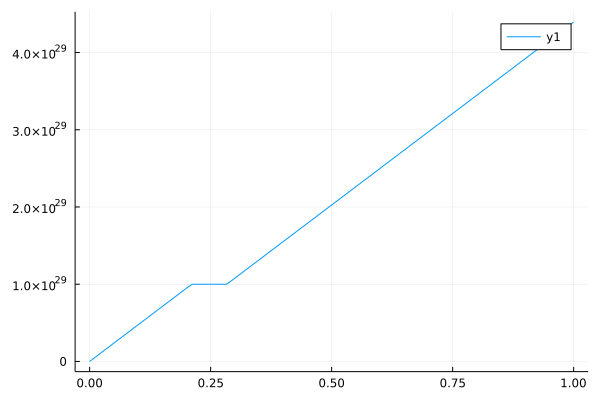

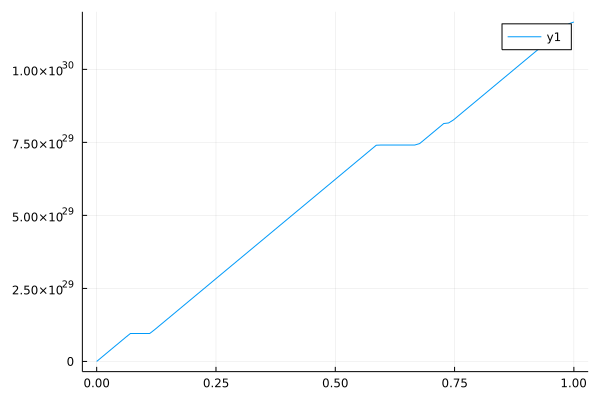

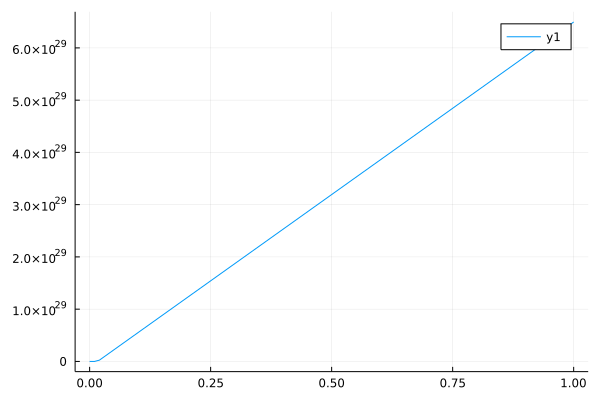

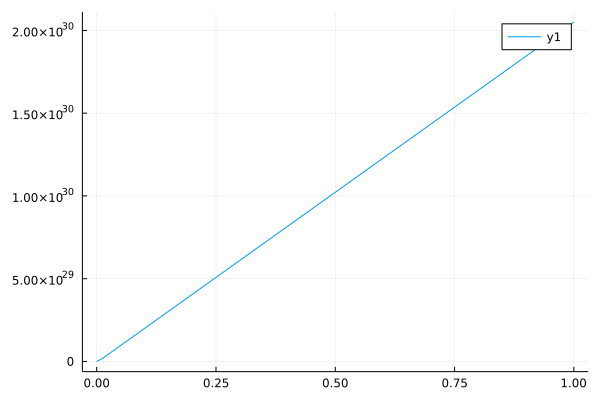

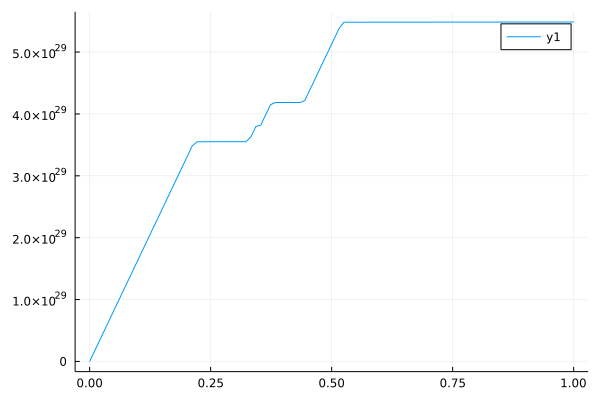

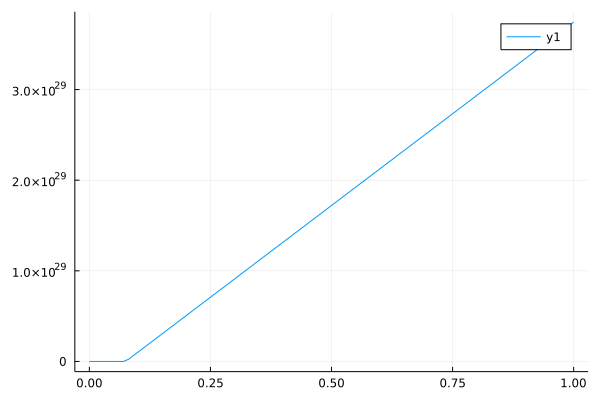

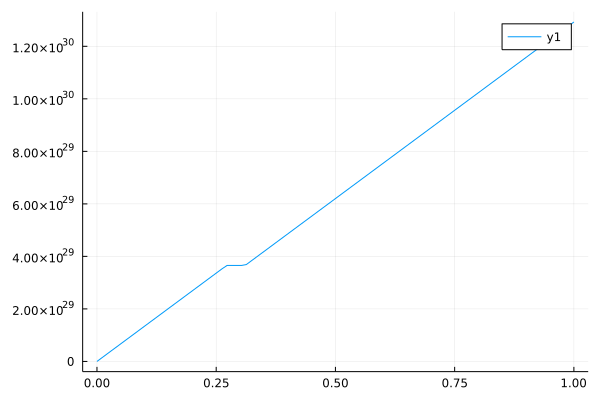

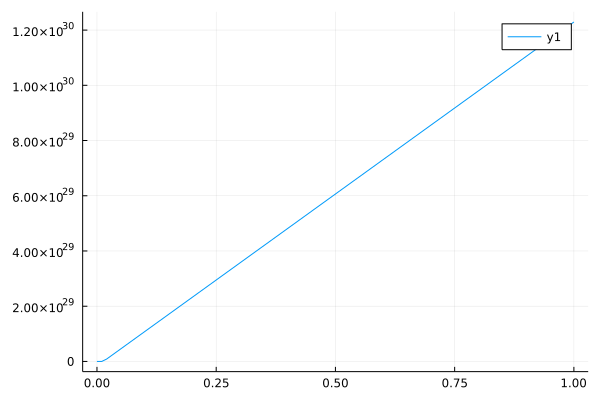

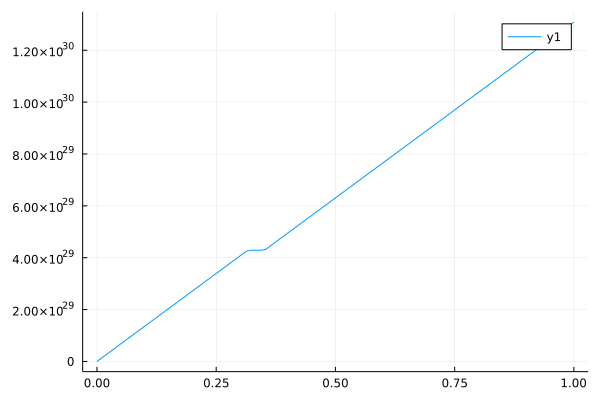

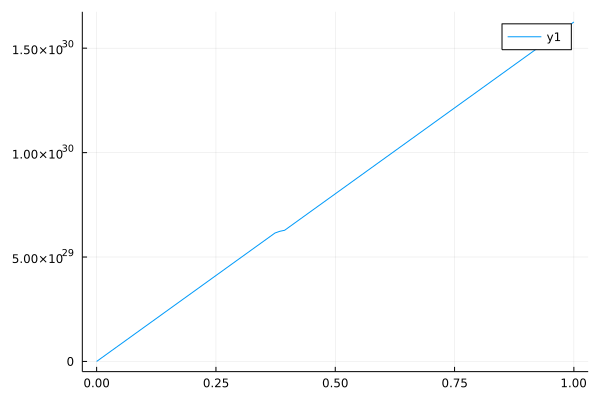

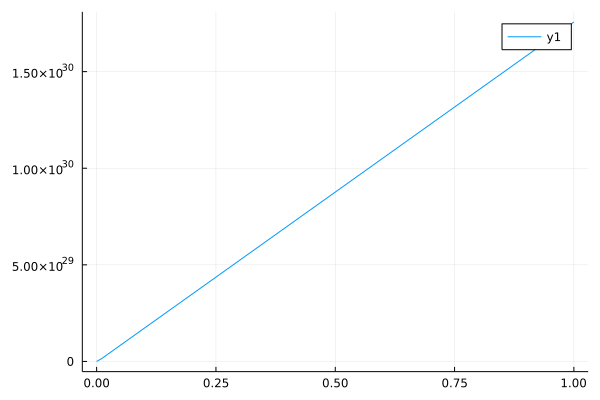

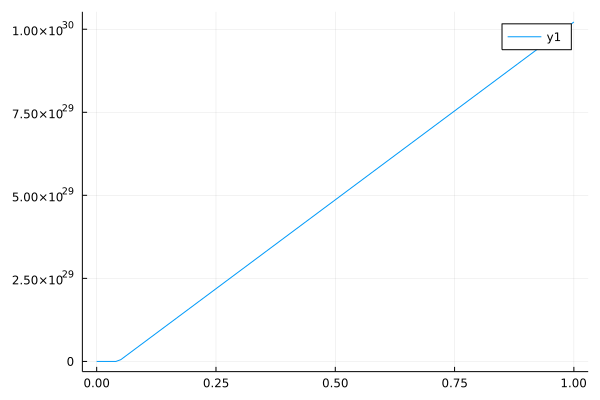

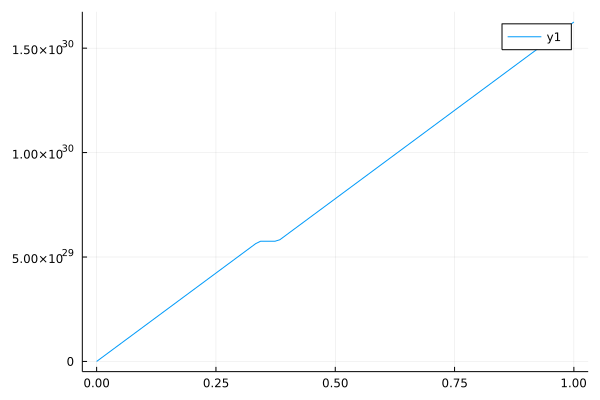

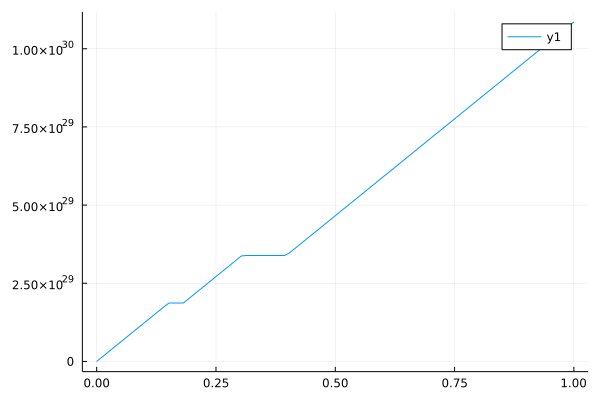

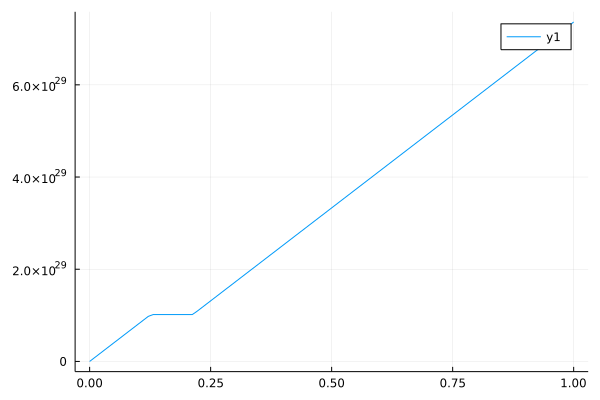

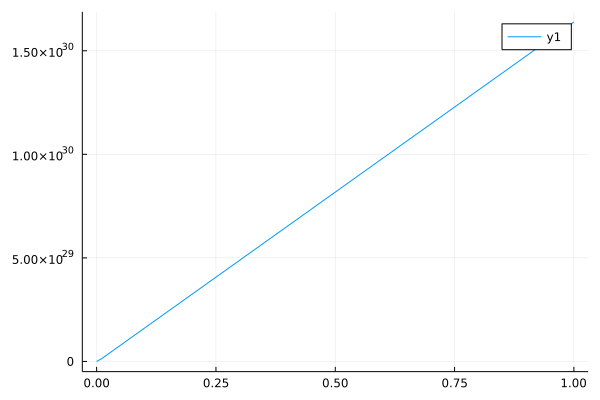

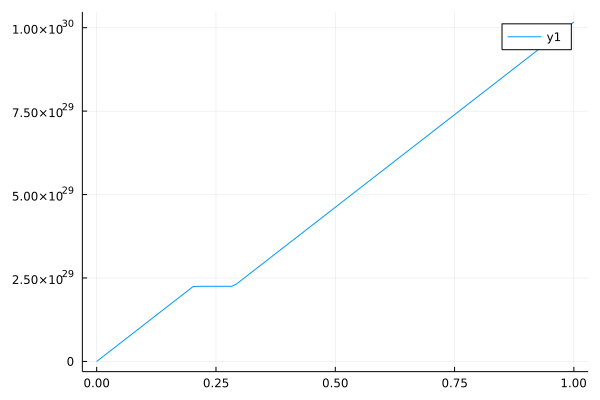

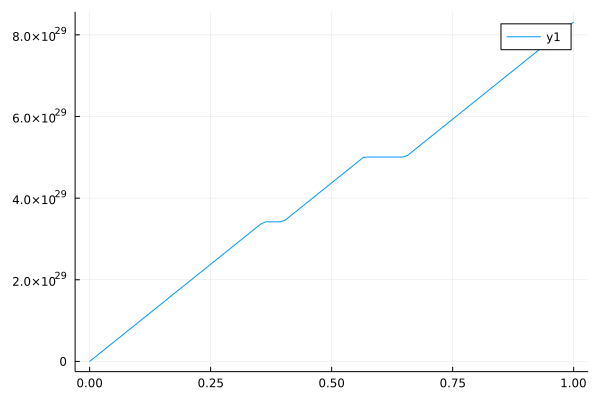

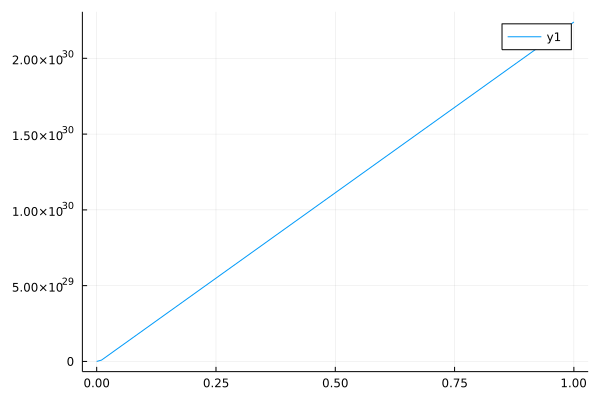

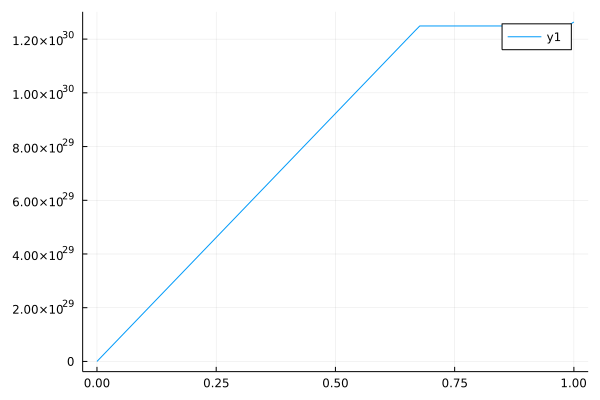

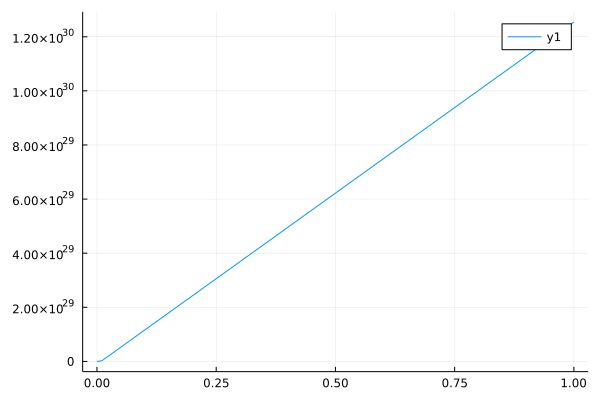

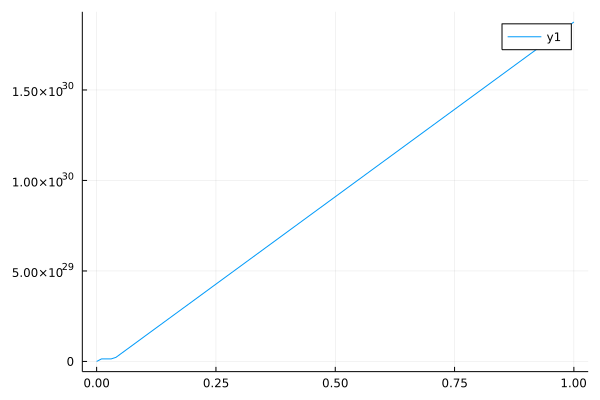

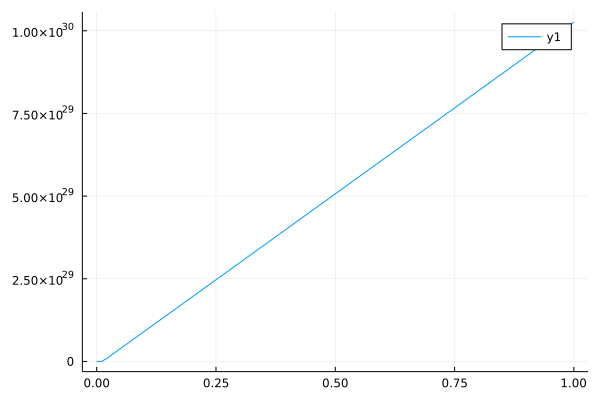

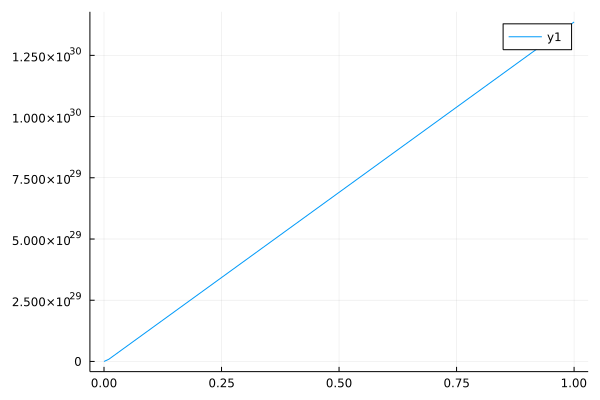

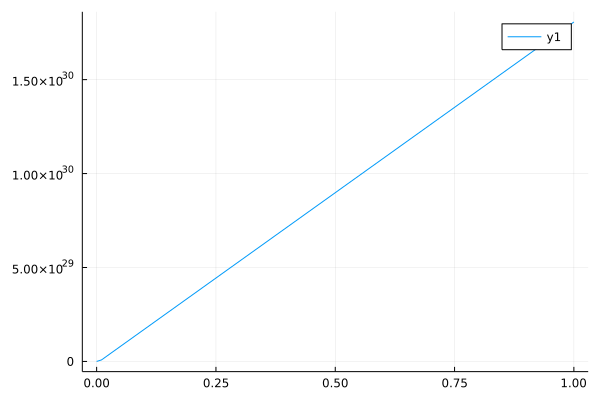

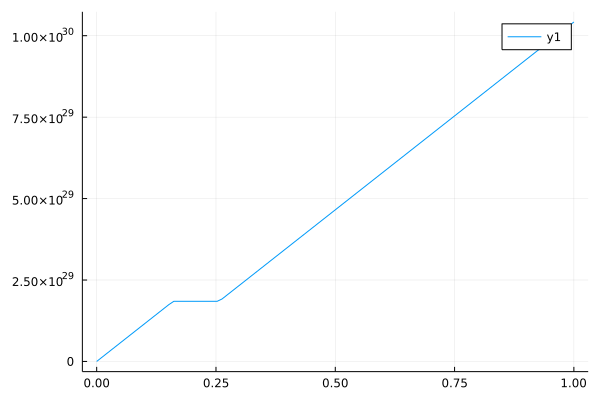

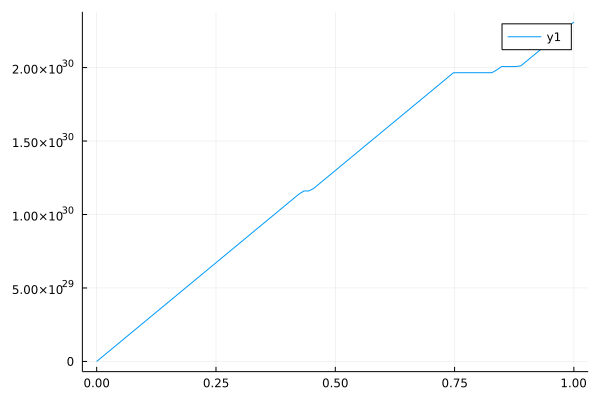

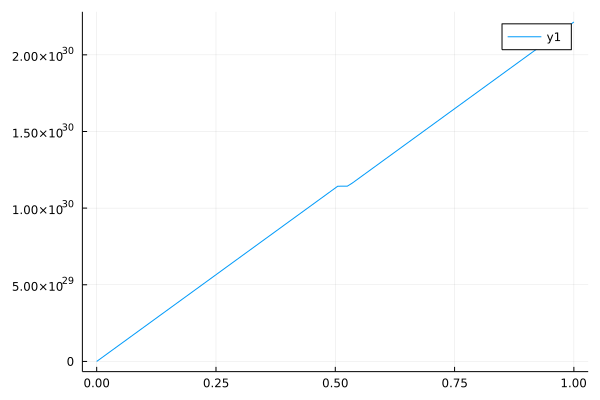

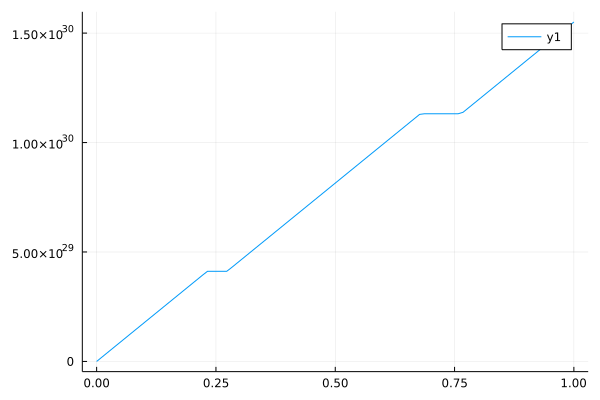

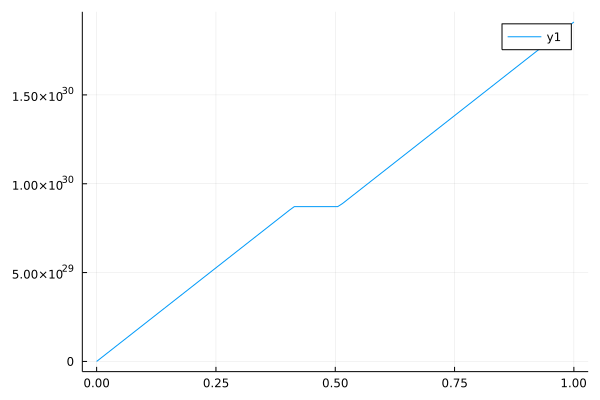

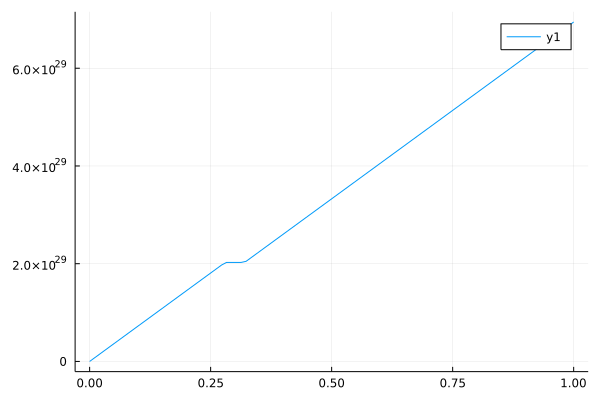

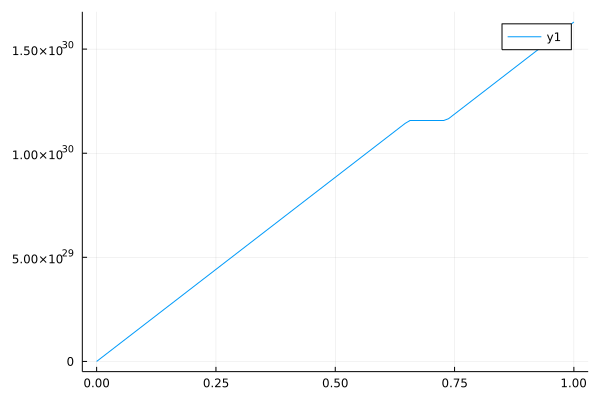

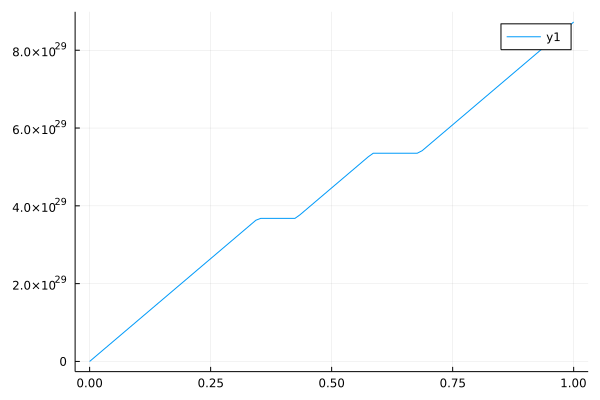

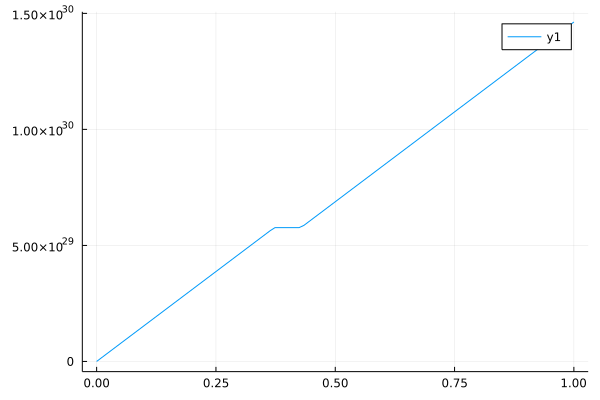

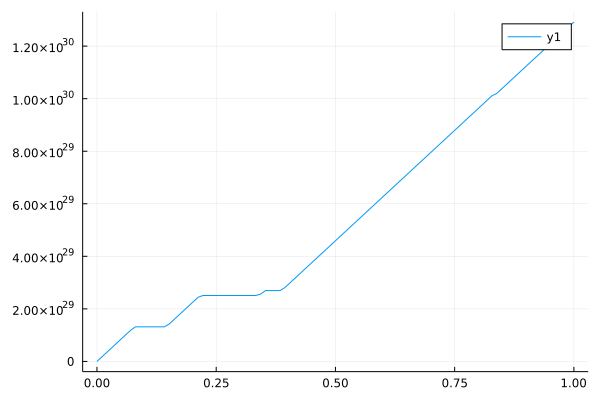

In [8]:
a = [i for i in eachindex(ixs) if length(ixs[i])>0]
for i in a
    y = [column_depth(trs[i], x, geo.valley) for x in LinRange(0,1,100)]
    plt = plot(LinRange(0, 1, 100), y)
    display(plt)
end

In [ ]:
geo.valley(5.4413469838993614e10, 1.7859076322556334e9)

In [46]:
@time Tracks.inverse_column_depth(trs[1], 6e29, geo.valley)

  0.561002 seconds (5.02 M allocations: 143.297 MiB, 9.65% gc time)


0.4803637645979064

In [50]:
@time Tracks.inverse_column_depth(trs[1], 6e29, geo.valley, ixs=ixs[1])

  0.001234 seconds (7.60 k allocations: 287.375 KiB)


0.4803637645979064

In [22]:
ixs = Tracks.intersect.(trs, geo.valley)
[i for i in eachindex(ixs) if length(ixs[i])>0]

40-element Vector{Int64}:
 117
 179
 185
 220
 242
 312
 322
 382
 397
 401
 428
 442
 459
   ⋮
 754
 769
 807
 813
 820
 851
 897
 921
 923
 936
 951
 983

In [17]:
@time Tracks.compute_ranges.(trs, Ref(geo.valley), ixs, Ref(1))

  0.017565 seconds (91.51 k allocations: 3.560 MiB)


1000-element Vector{Vector{Tuple{Float64, Bool}}}:
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 ⋮
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]
 [(1.0, 1)]

In [37]:
[1,2].*[1,2]

2-element Vector{Int64}:
 1
 4

In [35]:
@time Tracks.column_depth(trs[312], 1., geo.valley, ixs=ixs[312])

  0.000413 seconds (248 allocations: 8.734 KiB)


4.395335550163888e29

In [34]:
@time Tracks.column_depth(trs[312], 1., geo.valley)

  0.018116 seconds (140.52 k allocations: 4.006 MiB)


4.395335550163888e29